<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-an-audio-file" data-toc-modified-id="Loading-an-audio-file-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Loading an audio file</a></span></li><li><span><a href="#Playing-Audio" data-toc-modified-id="Playing-Audio-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Playing Audio</a></span></li><li><span><a href="#Visualizing-Audio" data-toc-modified-id="Visualizing-Audio-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Visualizing Audio</a></span><ul class="toc-item"><li><span><a href="#Waveform" data-toc-modified-id="Waveform-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Waveform</a></span></li><li><span><a href="#Spectrogram" data-toc-modified-id="Spectrogram-0.3.2"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span>Spectrogram</a></span></li><li><span><a href="#Log-Frequency-axis" data-toc-modified-id="Log-Frequency-axis-0.3.3"><span class="toc-item-num">0.3.3&nbsp;&nbsp;</span>Log Frequency axis</a></span></li></ul></li><li><span><a href="#Creating-an-audio-signal" data-toc-modified-id="Creating-an-audio-signal-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Creating an audio signal</a></span></li><li><span><a href="#Playing-the-sound" data-toc-modified-id="Playing-the-sound-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Playing the sound</a></span></li><li><span><a href="#Saving-the-signal" data-toc-modified-id="Saving-the-signal-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Saving the signal</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#1.-Zero-Crossing-Rate" data-toc-modified-id="1.-Zero-Crossing-Rate-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Zero Crossing Rate</a></span></li><li><span><a href="#2.Spectral-Centroid" data-toc-modified-id="2.Spectral-Centroid-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2.Spectral Centroid</a></span></li><li><span><a href="#3.Spectral-Rolloff" data-toc-modified-id="3.Spectral-Rolloff-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3.Spectral Rolloff</a></span></li><li><span><a href="#4.MFCC" data-toc-modified-id="4.MFCC-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4.MFCC</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Chroma-Frequencies" data-toc-modified-id="Chroma-Frequencies-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Chroma Frequencies</a></span></li></ul></li></ul></div>

## Loading an audio file

In [5]:
ruta = 'P:/Documentos/ICAI/Clases/Analisis de Datos No Estructurados/Audio/data/'

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import librosa
audio_path = ruta + 'T08-violin.wav'

x , sr = librosa.load(audio_path)



## Playing Audio
Using IPython.display.Audio, to play the audio

In [17]:
import IPython.display as ipd
ipd.Audio(audio_path)

You can even use an mp3 or a WMA format for the audio example.

## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveplot:


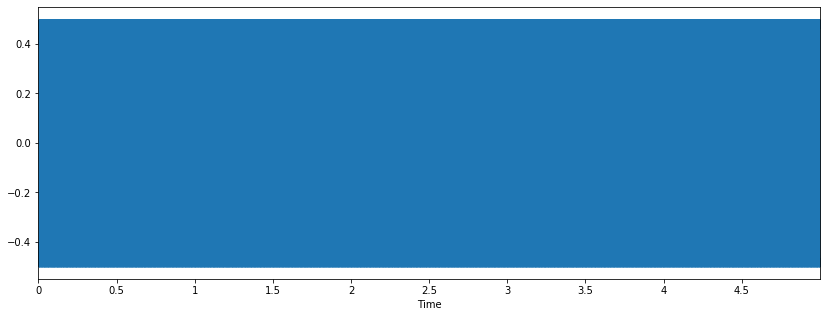

In [16]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

### Spectrogram
We can also display a spectrogram using librosa.display.specshow.

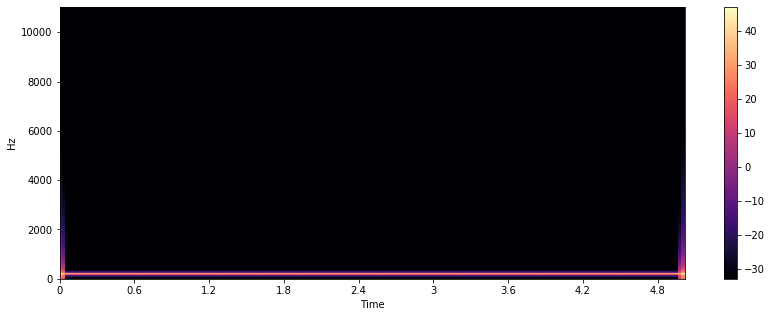

In [15]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**YOUR TURN:**

- Try to upload different sounds (animals, words, people, etc.) to see differences on the spectogram.
For example: "hola" versus "adios" spectogram


### Log Frequency axis

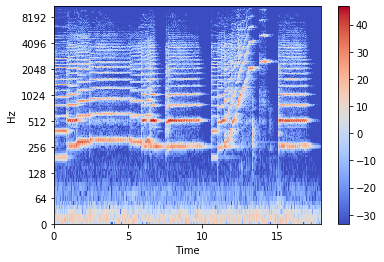

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Creating an audio signal
Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.


In [13]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz


## Playing the sound


In [18]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Saving the signal


In [13]:
librosa.output.write_wav('tone_440.wav', x, sr)

# Feature Extraction

In [19]:
x, sr = librosa.load(ruta + 'T08-violin.wav')
ipd.Audio(x, rate=sr)

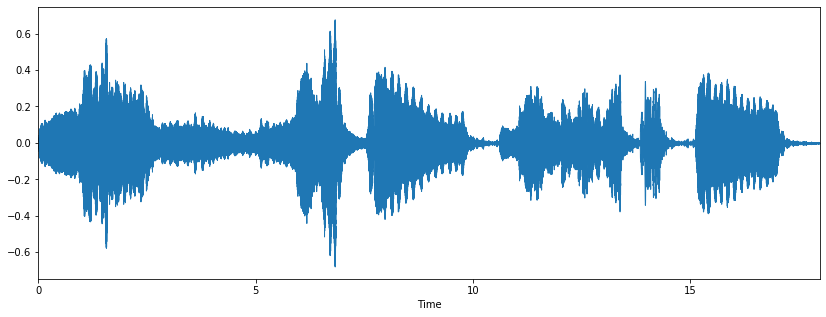

In [20]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## 1. Zero Crossing Rate

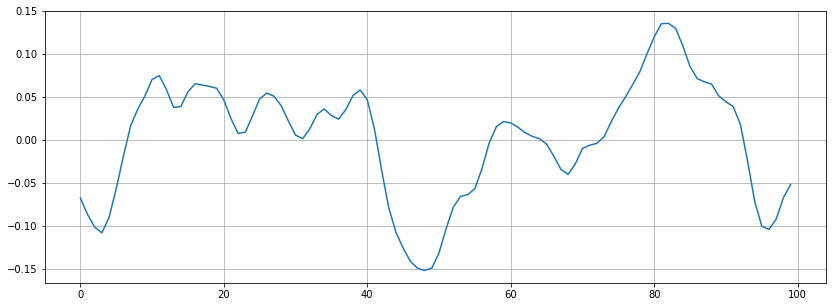

In [8]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [10]:
print(sum(zero_crossings))

6


## 2.Spectral Centroid

In [21]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(775,)

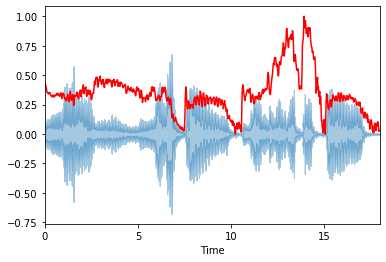

In [22]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## 3.Spectral Rolloff 

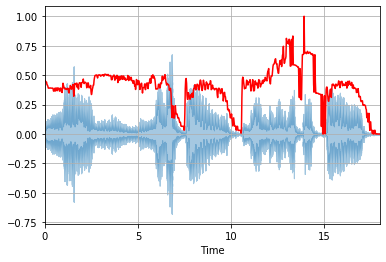

In [23]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## 4.MFCC

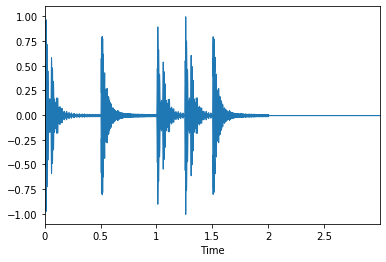

In [24]:
x, fs = librosa.load(ruta+'simple_loop.wav')
librosa.display.waveplot(x, sr=sr)

(20, 130)


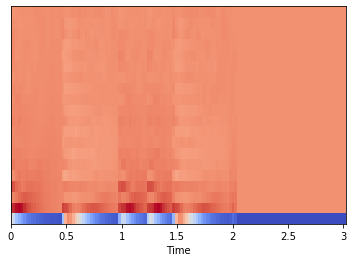

In [25]:
# MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Feature Scaling
Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [16]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.4671913e-08  0.0000000e+00 -2.9343825e-08  0.0000000e+00
  1.4671913e-08  0.0000000e+00  2.9343825e-08  0.0000000e+00
  2.9343825e-08 -2.9343825e-08 -1.4671913e-08  0.0000000e+00
  1.4671913e-08  2.9343825e-08  0.0000000e+00  1.4671913e-08
 -1.4671913e-08  1.4671913e-08  0.0000000e+00  0.0000000e+00]
[1.        0.9999999 1.0000001 1.        0.9999999 1.        0.9999999
 1.0000001 1.        0.9999999 0.9999999 1.        1.        1.0000001
 1.0000001 1.0000001 1.        1.        1.        1.0000001]


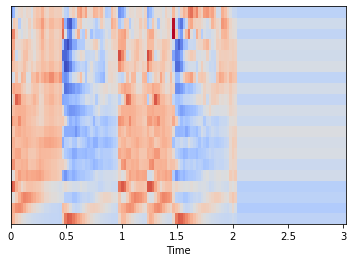

In [17]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies

In [18]:
# Loadign the file
x, sr = librosa.load(ruta + 'simple_loop.wav')
ipd.Audio(x, rate=sr)

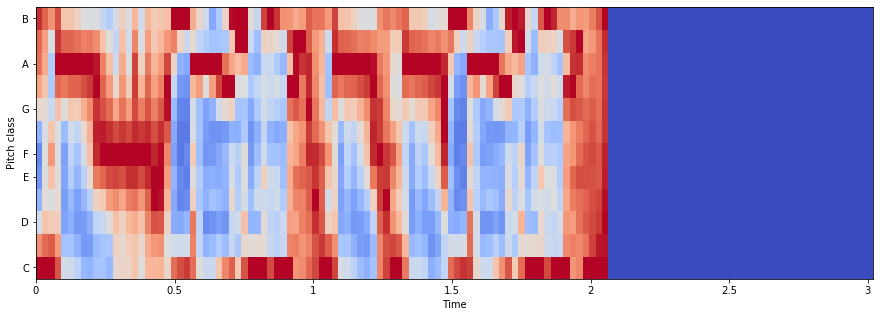

In [19]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')